<h1>Sales Analysis</h1>

<h3>import Required Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<h4>Task 1:Merge 12 months data in to single dataframe</h4>

In [2]:
from os import listdir
from os.path import isfile, join

files = [file for file in listdir('Monthly Data')]

alldata=pd.DataFrame()

for file in files:
    df=pd.read_csv('Monthly Data/'+file)
    alldata=pd.concat([alldata,df])

alldata.to_csv('12MonthData.csv',index=False)

<h3>Load Merged File</h3>



In [3]:
data=pd.read_csv('12MonthData.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h3>Cleaning Data</h3>

<h4>Task2.Drop NaN Rows</h4>

In [4]:
#find rows contains NaN

nan_df=data[data.isna().any(axis=1)]

In [5]:
#drop rows contains all columns NAN value

data=data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<h4>Task 3.find 'Or' and delete it</h4>

In [6]:
temp_df=data[data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
data=data[data['Order Date'].str[0:2]!='Or']

In [8]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<h3>Task 3.Convert Data to its correct type</h3>

In [9]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
#convert  Quantity Ordered     and Price to Each in Numeric type instead of Object type

data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered']) #make int
data['Price Each']=pd.to_numeric(data['Price Each'])  # makes float


data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

<h3>Add Month Columns Using order date </h3>

In [12]:
data['Month']=data['Order Date'].str[0:2]
data['Month']=data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


<h3>Add 'Total' Columns Contains (Quantity Ordered * Price Each)</h3>

In [13]:
data['Total']=data['Quantity Ordered']*data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
#let arrange like Quantity Ordered ,Price Each and Than Total
cols=list(data.columns)
cols

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month',
 'Total']

In [15]:
data=data[cols[0:4]+[cols[-1]]+cols[4:7]]

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


<h3>Add a City Columns</h3>

In [17]:
# use apply()


# def get_city(city):
#     return city.split(',')[1]
# data['City']=data['Purchase Address'].apply(lambda city:get_city(city))

def get_state(state):
    return state.split(',')[2][0:3]

data['State']=data['Purchase Address'].apply(lambda state:get_state(state))
data['City']=data['Purchase Address'].apply(lambda city:city.split(',')[1])
data.head()



,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles


<h2>Add Type of Product Columns</h2>
<h4>For example,</h4>
<p>Laptop,Phone,Cable,HeadPhone etc..</p>

In [18]:
data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [19]:
def get_type(x):
    ptype=x.split(' ')
    p_type=''
    if ptype[-1]=='Cable':
      p_type='Charging Cable'
    elif ptype[-1]=='iPhone':
       p_type='Phone'
    elif 'Batteries' in ptype:
       p_type='Battery'
    elif 'Washing' in ptype:
       p_type='Washing Machine'
    else:
       p_type=ptype[-1]
    return p_type

In [20]:
data['Type']=data['Product'].apply(lambda x:get_type(x))

In [21]:
data[data['Product']=='AA Batteries (4-pack)' ]

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type
14,176570,AA Batteries (4-pack),1,3.84,3.84,04/22/19 15:09,"186 12th St, Dallas, TX 75001",4,TX,Dallas,Battery
24,176579,AA Batteries (4-pack),1,3.84,3.84,04/11/19 10:23,"886 Jefferson St, New York City, NY 10001",4,NY,New York City,Battery
61,176614,AA Batteries (4-pack),1,3.84,3.84,04/07/19 21:01,"647 Jackson St, San Francisco, CA 94016",4,CA,San Francisco,Battery
69,176622,AA Batteries (4-pack),1,3.84,3.84,04/11/19 20:16,"983 11th St, San Francisco, CA 94016",4,CA,San Francisco,Battery
71,176624,AA Batteries (4-pack),1,3.84,3.84,04/28/19 10:44,"664 Church St, Seattle, WA 98101",4,WA,Seattle,Battery
...,...,...,...,...,...,...,...,...,...,...,...
186794,259305,AA Batteries (4-pack),1,3.84,3.84,09/24/19 20:46,"47 North St, New York City, NY 10001",9,NY,New York City,Battery
186820,259330,AA Batteries (4-pack),2,3.84,7.68,09/25/19 22:01,"763 Washington St, Seattle, WA 98101",9,WA,Seattle,Battery
186831,259340,AA Batteries (4-pack),2,3.84,7.68,09/18/19 20:18,"544 Hickory St, Los Angeles, CA 90001",9,CA,Los Angeles,Battery
186833,259342,AA Batteries (4-pack),1,3.84,3.84,09/07/19 20:09,"579 South St, Boston, MA 02215",9,MA,Boston,Battery


<h3>Q1:What is the best month for sales?how much?</h3>

In [22]:
#grouping data by months
data.groupby("Month").sum()

,Quantity Ordered,Price Each,Total
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [23]:
result=data.groupby("Month").sum()['Total']
result

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total, dtype: float64

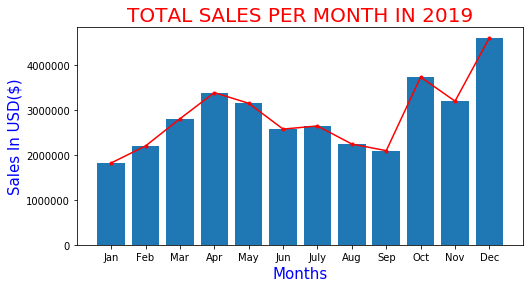

In [24]:
#Plot char and make decision of answer
months=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']



plt.figure(figsize=(8,4))
plt.bar(months,result)
plt.plot(months,result,'r.-')
plt.xticks(months)
plt.title('TOTAL SALES PER MONTH IN 2019',fontdict={'fontsize':20,'color':'red'})
plt.xlabel('Months',fontdict={'fontsize':15,'color':'blue'})
plt.ylabel('Sales In USD($)',fontdict={'fontsize':15,'color':'blue'})
plt.show()

In [25]:
result.max()

4613443.340001534

<p>Hence we can Say that <b>December</b> is best month for sales in 2019  <br> amount=<b>$4613443.340001534<b>  </p>

<h3>Q2:Which City Had highest Number of sales</h3>

In [26]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones


In [27]:
result=data.groupby('City').sum()['Total']
result

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Total, dtype: float64

In [28]:
result.max()

8262203.910004012

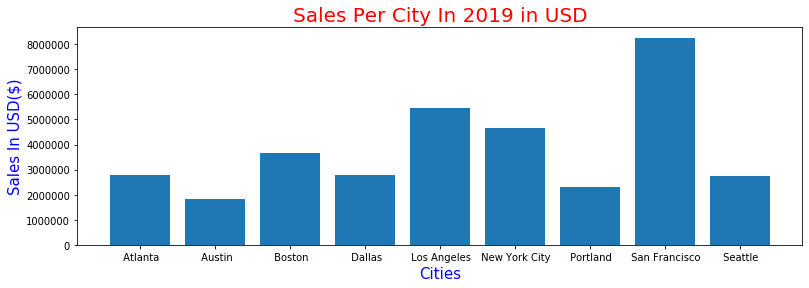

In [29]:
city=[city for city,df in data.groupby('City')]

# or

# city=list(data.City.unique())
# city.sort()

values=list(result)


plt.figure(figsize=(13,4))
plt.ylabel('Sales In USD($)',fontdict={'fontsize':15,'color':'blue'})

plt.title('Sales Per City In 2019 in USD',fontdict={'fontsize':20,'color':'red'})
# plt.xticks(rotation='vertical')
plt.bar(city,result)

plt.ylabel('Sales In USD($)',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel('Cities',fontdict={'fontsize':15,'color':'blue'})
plt.show()

<p>Hence we can Say that <b>San Francisco </b> is best City for sales in 2019 <br> amount=<b>$8262203.910004012<b></p>

In [30]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones


<h3>Q3:Which time we Should show advertise to customers to buy more and more product</h3>

In [31]:
#convert Order Date in to Datetime fromat
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Hour']=data['Order Date'].dt.hour
data['Minute']=data['Order Date'].dt.minute
# data.drop(columns=['hour'],inplace=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,9,27


In [32]:
data.groupby('Hour').count()['Order ID'][1]

2350

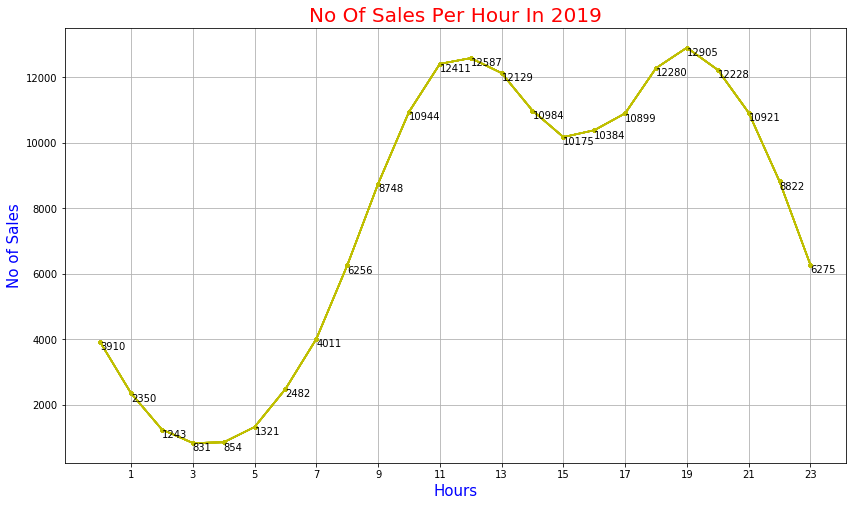

In [33]:
hours=[hour for hour,df in data.groupby('Hour')]
values=[]

plt.figure(figsize=(14,8))
for hour in hours:
    values.append(data.groupby('Hour').count()['Order ID'][hour])
plt.plot(hours,data.groupby('Hour').count(),'y.-')
plt.style.use('default')

plt.title('No Of Sales Per Hour In 2019',fontdict={'fontsize':20,'color':'red'})
for i,j in zip(hours,values):
    plt.annotate(str(j),xy=(i,j) ,size=10,va='top')
plt.xticks(range(1,25,2))

plt.xlabel('Hours',fontdict={'fontsize':15,'color':'blue'})
plt.ylabel('No of Sales',fontdict={'fontsize':15,'color':'blue'})

plt.grid()
plt.show()

<h3>Q4:which product are mostly sold together</h3>

<p>Some Clues that show with product were purchesed together</p>
<ul>
    <li>Same Order ID</li>
    <li>Same Order ID with same Order Address</li>
</ul>

In [34]:
new_df=data[data['Order ID'].duplicated(keep=False)]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,19,42
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,CA,Los Angeles,Charging Cable,19,42
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,MA,Boston,Headphones,11,31


In [35]:
new_df['Grouped_col']=new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\Prakhar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
new_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute,Grouped_col
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,CA,Los Angeles,Charging Cable,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,MA,Boston,Headphones,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,MA,Boston,Headphones,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,CA,San Francisco,Battery,17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,CA,San Francisco,Phone,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,NY,New York City,Charging Cable,11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,NY,New York City,Charging Cable,11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
# now drop duplicates
new_df=new_df[['Order ID','Grouped_col']].drop_duplicates()

In [38]:
new_df.head()

,Order ID,Grouped_col
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

In [40]:
count=Counter()
for item in new_df['Grouped_col']:
    item_list=item.split(',')
    count.update(Counter(combinations(item_list,2)))  #you can change 2 to 3 for most common 2 item to most common 3 items
    
# print(count)
# count.most_common(10)

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


<h3>Q5:What Product Sold the Most And Why?</h3>

In [41]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,9,27


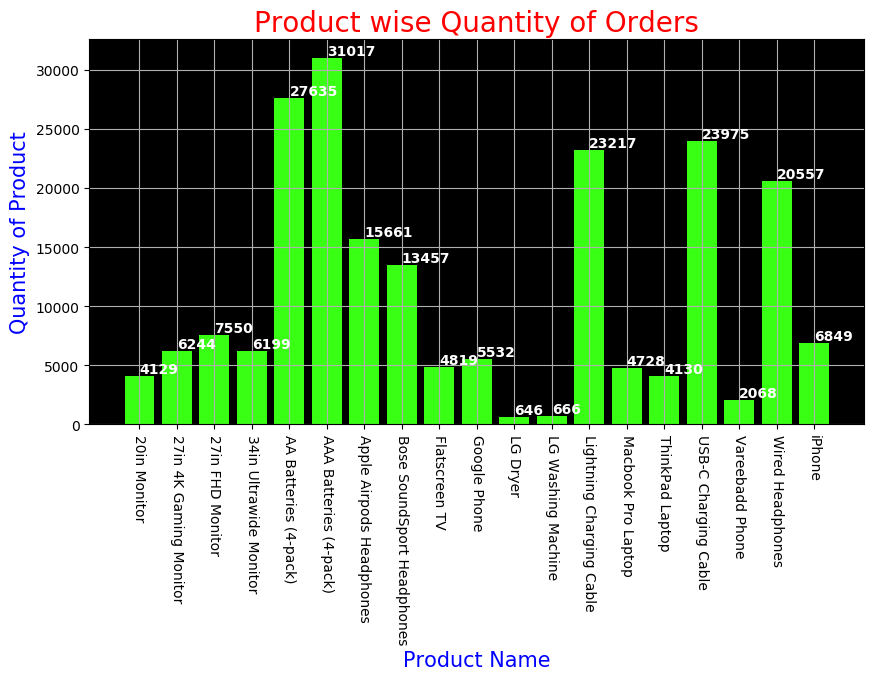

In [42]:
product=data.groupby('Product')
# product.sum()

quantity=product.sum()['Quantity Ordered']


plt.figure(figsize=(10,5))
products=[product for product,df in data.groupby('Product')]
# products
plt.bar(products,quantity,color='#39ff14')
plt.xticks(rotation='-90') 

plt.title('Product wise Quantity of Orders',fontdict={'fontsize':20,'color':'red'})

plt.xlabel('Product Name',fontdict={'fontsize':15,'color':'blue'})
plt.ylabel('Quantity of Product',fontdict={'fontsize':15,'color':'blue'})

# plt.plot(products,quantity,'y.-')
ax = plt.gca()
ax.set_facecolor('black')

for i,j in zip(products,quantity):
    plt.annotate(str(j),xy=(i,j) ,size=10,va='bottom',color='white',fontweight='bold')
    
plt.grid()
plt.show()

<h4>Hence,We can see that AA batteries(4-pack) is most sold product in 2019 quantity is:31017</h4>

In [43]:
prices=data.groupby('Product').mean()['Price Each']
# print(prices)

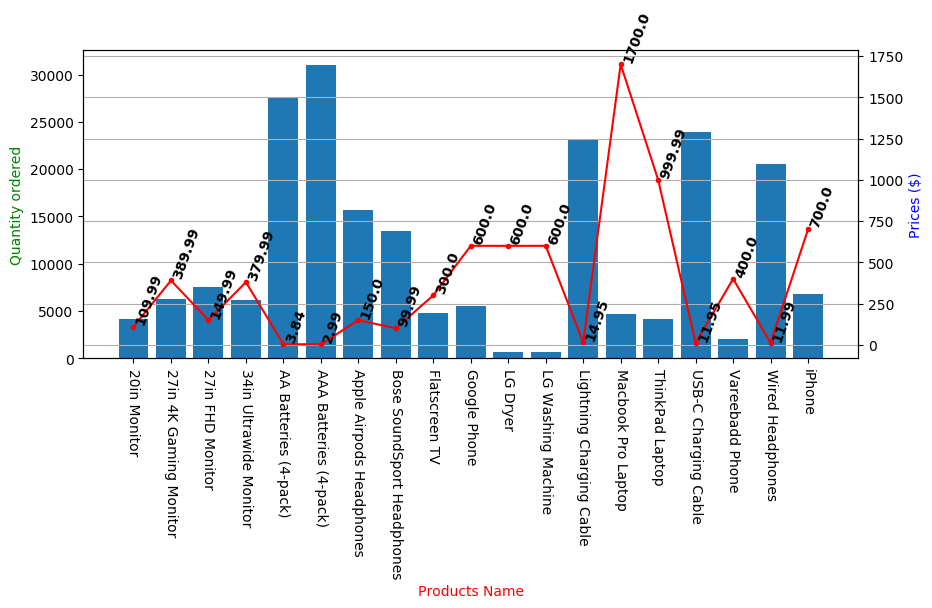

In [44]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax2 = ax1.twinx()
# ax1.figure(figsize=(5,5))

ax1.bar(products, quantity)
ax2.plot(products,prices, 'r.-')
ax1.set_xlabel('Products Name',color='r')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products,rotation='-90') 

for i,j in zip(products,prices):
    plt.annotate(str(round(j,2)),xy=(i,round(j,2)) ,size=10,va='bottom',rotation='70',fontweight='bold')


plt.grid()

plt.show()

In [45]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,9,27


<h3>Q6.Which phone most popular among customers</h3>

In [46]:
phonedf=data[data['Type']=='Phone']

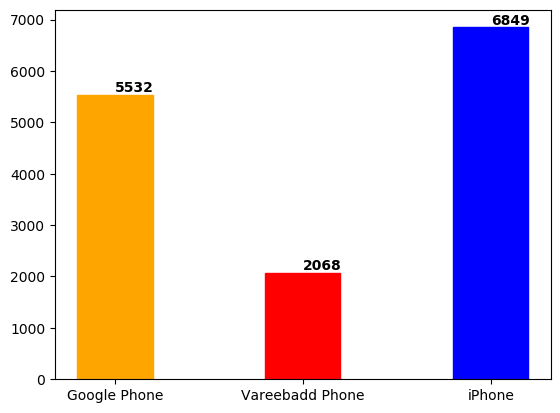

In [47]:
product=phonedf.groupby('Product')
quantity=product.sum()['Quantity Ordered']

products=[x for x,df in phonedf.groupby('Product')]

bars=plt.bar(products,quantity,width=0.4)



bars[0].set_color('orange')
bars[1].set_color('red')
bars[2].set_color('blue')

for i,j in zip(products,quantity):
    plt.annotate(str(round(j,2)),xy=(i,round(j,2)) ,size=10,va='bottom',fontweight='bold')

plt.show()

In [48]:
data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<h3>Q7.Which Phone is most sold according to months of 2019</h3>

In [49]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,Dallas,Charging Cable,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Phone,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,9,27


In [50]:
phonedf=data[data['Type']=='Phone']

In [51]:
# product=phonedf.groupby('Product')
# quantity=product.sum()['Quantity Ordered']
# phones=[phone for phone,df in phonedf.groupby('Product')]

# # product.sum()
# plt.bar(phones,quantity)

# for i,j in zip(phones,quantity):
#     plt.annotate(str(round(j,2)),xy=(i,round(j,2)) ,size=10,va='bottom',color='red',fontweight='bold')

In [52]:
months=phonedf.groupby(['Month','Product'])
# monthsname=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

quantity=months.count()['Quantity Ordered']
# quantity



In [53]:
st={}
temp=[]
for i in range(1,13):
    for product in phonedf['Product'].unique():
        if product not in temp:
            st[product]=[]
        temp.append(product)
        st[product].append(quantity[i][product])

In [54]:
st

{'Google Phone': [318, 379, 463, 580, 479, 391, 411, 359, 341, 597, 493, 714],
 'iPhone': [381, 439, 537, 691, 640, 533, 501, 439, 396, 715, 664, 906],
 'Vareebadd Phone': [125,
  129,
  174,
  220,
  185,
  155,
  146,
  141,
  126,
  203,
  177,
  284]}

In [55]:
st={'Google Phone': [318, 379, 463, 580, 479, 391, 411, 359, 341, 597, 493, 714],
 'iPhone': [381, 439, 537, 691, 640, 533, 501, 439, 396, 715, 664, 906],
 'Vareebadd Phone': [125, 129,174,220,185,155,146,141,126,203,177,284]}

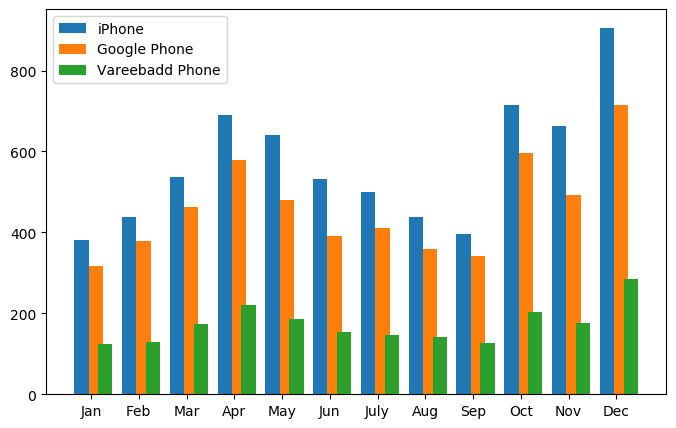

In [56]:
# for key,value in st.items():
#     print(key,value)
#     plt.bar(monthsname,value,label=key)
w=0.3

#IMP


monthsname=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
xpos=np.arange(len(monthsname))

plt.figure(figsize=(8,5))    
plt.xticks(xpos,monthsname)
plt.bar(xpos-0.2,st['iPhone'],w,label='iPhone')
plt.bar(xpos+0.1,st['Google Phone'],w,label='Google Phone')
plt.bar(xpos+0.3,st['Vareebadd Phone'],w,label='Vareebadd Phone')

# plt.figure(figsize=(10,5))

plt.legend()
plt.show()

In [57]:
st={'Google Phone': [318, 379, 463, 580, 479, 391, 411, 359, 341, 597, 493, 714],
 'iPhone': [381, 439, 537, 691, 640, 533, 501, 439, 396, 715, 664, 906],
 'Vareebadd Phone': [125, 129,174,220,185,155,146,141,126,203,177,910]}

In [58]:
# import pandas as pd
# pd.DataFrame(st,index=monthsname ).plot.bar()

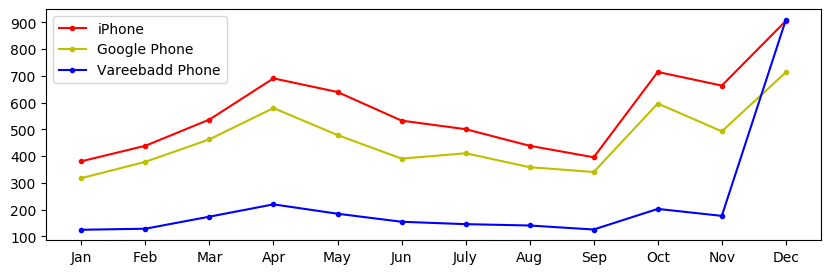

In [59]:
# for key,value in st.items():
#     print(key,value)
#     plt.bar(monthsname,value,label=key)
w=0.3

#IMP


monthsname=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
xpos=np.arange(len(monthsname))

plt.figure(figsize=(10,3))    

plt.xticks(xpos,monthsname)
plt.yticks(range(0,1100,100))

plt.plot(monthsname,st['iPhone'],'r.-',label='iPhone')
plt.plot(monthsname,st['Google Phone'],'y.-',label='Google Phone')
plt.plot(monthsname,st['Vareebadd Phone'],'b.-',label='Vareebadd Phone')



plt.legend()
plt.show()

<h3>Q :Which HeadPhones is most popular in different city</h3>

In [60]:
headphones=data[data['Type']=='Headphones']
headphones.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Order Date,Purchase Address,Month,State,City,Type,Hour,Minute
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,Boston,Headphones,22,30
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles,Headphones,9,27
7,176563,Bose SoundSport Headphones,1,99.99,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,WA,Seattle,Headphones,7,46
10,176566,Wired Headphones,1,11.99,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,MA,Boston,Headphones,14,5


In [61]:

quantity=headphones.groupby(['City','Product']).count()['Quantity Ordered']
cities=[city for city,df in headphones.groupby('City')]
st={}
for product,df in headphones.groupby('Product'):
    st[product]=[]
    


In [62]:
for city,df in headphones.groupby('City'):
    for product,df in headphones.groupby('Product'):
        st[product].append(quantity[(city,product)])
                

            
            
# print(quantity.keys())

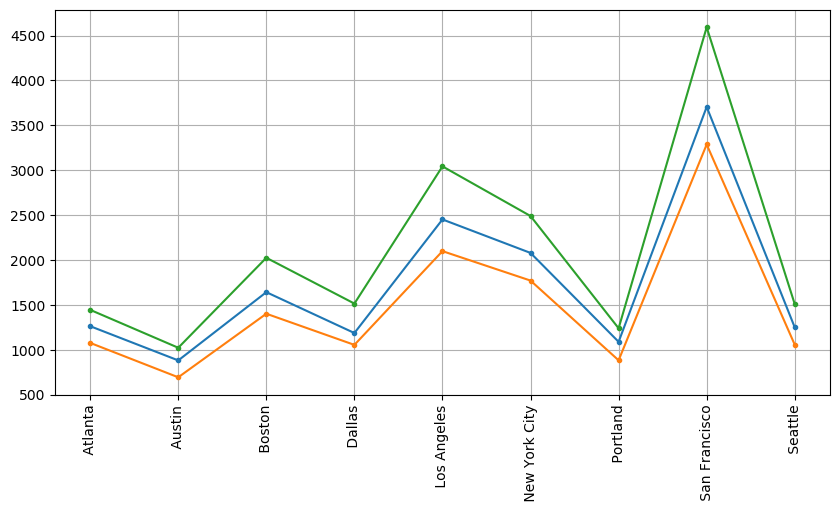

In [63]:

plt.figure(figsize=(10,5))
for product,df in headphones.groupby('Product'):
    plt.plot(cities,st[product],marker='.')
    
plt.xticks(cities,rotation='90')
plt.grid()
plt.show()

<h4>Q:In which City can make highest and lowest turn over and how much?</h4>

In [64]:
grp=data.groupby('City')
turn_over=grp.sum()['Total']
quantity=grp.sum()['Quantity Ordered']

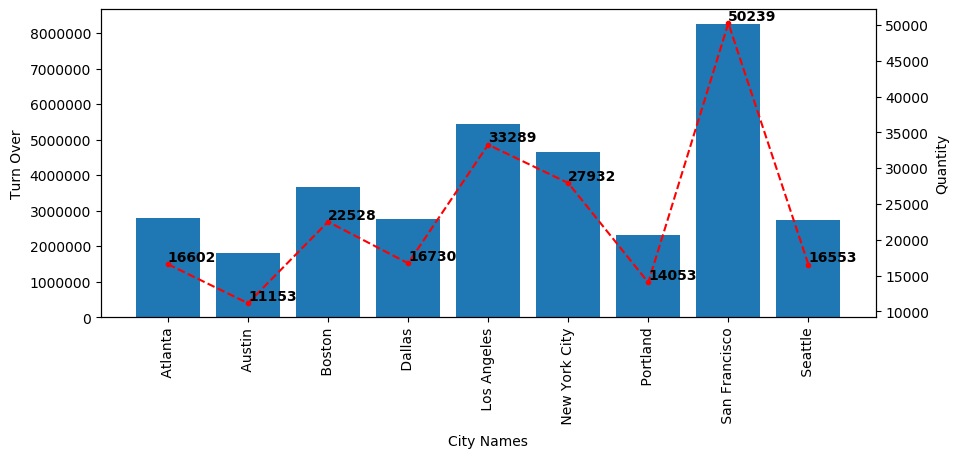

<Figure size 1000x400 with 0 Axes>

In [69]:

cities=[city for city,df in data.groupby('City')]
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()


plt.figure(figsize=(10,4))
ax1.bar(cities,turn_over)
ax2.plot(cities,quantity,'r.--')

ax1.set_xlabel('City Names')
ax1.set_ylabel('Turn Over')

ax2.set_ylabel('Quantity')

for i,j in zip(cities,quantity):
    ax2.annotate(str(round(j,2)),xy=(i,round(j,2)) ,size=10,va='bottom',fontweight='bold')
    
# for i,j in zip(cities,turn_over):
#     ax1.annotate(str(round(j,2)),xy=(i,round(j,2)) ,size=10,va='bottom')

ax1.set_xticklabels(cities,rotation='90')

plt.show()